We are importing the libraries which are required for Analysing.

In [741]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [743]:
#We are importing the dataframe.csv file which is given for analysing and Model building by using pandas

In [744]:
df = pd.read_csv("dataframe_.csv")

In [684]:
#Here We are displaying the data
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [745]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [746]:
df.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


- Just by looking at the data we can easily say that the data has 2 columns 
- The column names are "input" and "output"
- Both the columns are numerical columns

In [685]:
df.shape

(1697, 2)

Shape of the column is (1697,2) which means it has 2 columns and 1697 rows

In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


Both the column data types are float

In [686]:
#By using this we found that there are null values in the given data
df.isna().sum()

input     1
output    1
dtype: int64

In [687]:
#dropping the null columns as if we fill them with mean also it wouldn't be accurate
df.dropna(inplace = True)

In [688]:
#After dropping null values again we are checking the data if all the null values are removed or not
df.isna().sum()

input     0
output    0
dtype: int64

In [689]:
#After removing the null values 1696 rows are present in the data
df.shape

(1696, 2)

In [748]:
#By using this describe function we found the following data
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


- Count of input and output rows are 1696
- Mean of input is 1.159 and output is -34.08
- Standard deviation of input id 79.00 and output is 65.7711
- Min values of input is -134.96 and output is -132.42
- Median of input is 10.19 and output is -50.47
- Maximum values of input is 134.60 and output is 134.425

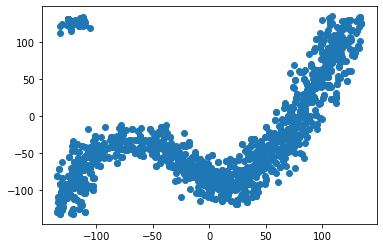

In [749]:
#This is the scatter plot for the data
plt.scatter(df['input'],df['output'])

C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


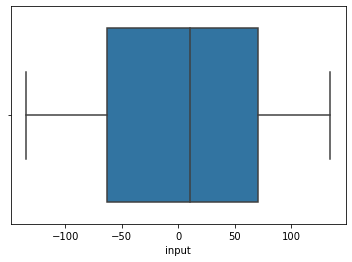

C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


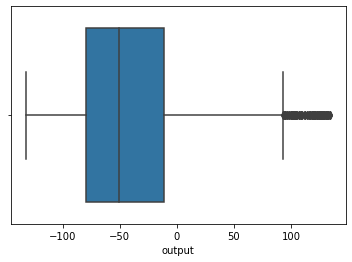

In [690]:
#Here we are plotting a boxplot to check weather we have outliers in the data or not
for col in df.columns.tolist():
    sns.boxplot(df[col])
    plt.show()

## OBSERVATIONS : 

We can easily tell that input column has no outliers and output column has a drastic range of outliers 
- Hence we are now gonna sort the outliers and drop them.

C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

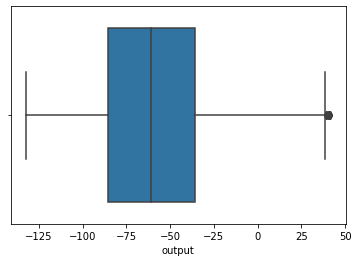

In [693]:
q1 = df['output'].quantile(0.25)
q2 = df['output'].quantile(0.50)
q3 = df['output'].quantile(0.75)
IQR1 = q3 - q1
otn = q1 - (1.5)*IQR1
otp = q3 + (1.5)*IQR1
ot = df['output'][(df['output'] < otn) | (df['output'] > otp)]
h = ot.index.tolist()
df.drop(h,inplace = True)
sns.boxplot(df['output'])

In [694]:
#After dropping the outliers, the data has 1430 rows
df.shape

(1430, 2)

# Data Preparation

In [695]:
#We are dividing the data into output and input y and X respectively
y = df["output"]
X = df["input"]

We took Train and Test split of 80:20 

In [696]:
#from sklearn library we are importing the required tratin_test_split module for splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1144,) (1144,)
(286,) (286,)


In [750]:
#By this the training data has 1144 rows
#Whereas test data has 286 rows

In [697]:
#We just saw the X_train data we can easily understand the data is not in the form of dataframe
X_train.head()

996      68.633331
420      90.633331
308      89.445250
319     100.467464
1546   -113.853088
Name: input, dtype: float64

In [698]:
#We are checking the type of data of X_train and found it is in series format
type(X_train)

pandas.core.series.Series

In [699]:
#So we converted the series type of data into dataframe and assigned into the same variable
X_train = pd.DataFrame(X_train)

In [700]:
#Then we are performing the data transformation, Here we make the system learn the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_transformed.head()

,input
996,1.157109
420,1.472251
308,1.455233
319,1.613122
1546,-1.456950


In [701]:
#Then we converted the X_test data also into dataframe which is in the series type before
X_test = pd.DataFrame(X_test)

In [702]:
#Then data tranformation is performed on the X_test even
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_transformed.head()

,input
303,1.177108
1420,1.205933
1270,-0.238391
1133,-1.464935
916,0.226005


- Now the data is prepared for training the Model
- Then we train different Models using the prepared data to check which Model gives the less error.

Here We are using regression Algorithms as the output y or the target variable is continues not discrete

# Linear Regression

In [703]:
#We are importing LinearRegression from sklearn and creating an object using it
#Then traing the model with the prepared data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [704]:
#Here we are predicting the output values for the input data
y_test_pred = regressor.predict(X_test_transformed)

In [705]:
#Then a data frame is created which shows the Actual and Predicted values of the output data
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
303,-18.117029,-37.282929
1420,11.947285,-36.787909
1270,-43.431051,-61.592166
1133,-86.814043,-82.656366
916,-95.000000,-53.616814


<AxesSubplot:xlabel='output', ylabel='Count'>

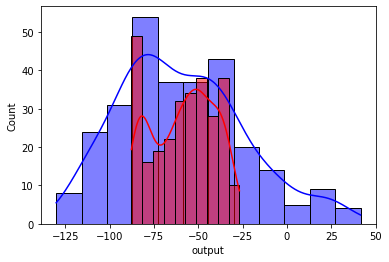

In [706]:
#Those Actual and Predicted values are compared and a graph is drawn
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

- The graph shows blue line for Actual data
- And red line for predicted data
- As we can see there is a lot of error or difference between 2 curves which means more error for Linear reagression model

In [707]:
#We imported metrics from sklearn and checked the mean absolute error, mean squared error,
#root mean squared error and determine which is the best model
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  26.18279872700464
Mean Squared Error:  955.4840671205646
Root Mean Squared Error:  30.91090531059491


# KNN Regression

In [708]:
#We are importing KNeighborsRegressor from sklearn and creating an object using it
#Then traing the model with the prepared data
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [709]:
#Here we are predicting the output values for the input data
y_test_pred = regressor.predict(X_test_transformed)

In [710]:
#Then a data frame is created which shows the Actual and Predicted values of the output data
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
303,-18.117029,-18.647600
1420,11.947285,-13.513845
1270,-43.431051,-62.149873
1133,-86.814043,-91.232409
916,-95.000000,-91.607391


<AxesSubplot:xlabel='output', ylabel='Count'>

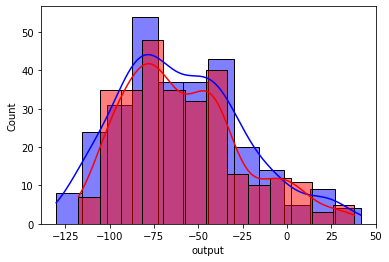

In [711]:
#Those Actual and Predicted values are compared and a graph is drawn
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

- The graph shows blue line for Actual data
- And red line for predicted data

In [712]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  13.447504207078321
Mean Squared Error:  293.3863182435642
Root Mean Squared Error:  17.128523527834037


# Decision Tree Regression

In [751]:
#We are importing DecisionTreeRegressor from sklearn and creating an object using it
#Then traing the model with the prepared data
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [714]:
#Here we are predicting the output values for the input data
y_test_pred = regressor.predict(X_test_transformed)

In [715]:
#Then a data frame is created which shows the Actual and Predicted values of the output data
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
303,-18.117029,-18.117029
1420,11.947285,11.947285
1270,-43.431051,-67.536096
1133,-86.814043,-86.814043
916,-95.000000,-95.000000


<AxesSubplot:xlabel='output', ylabel='Count'>

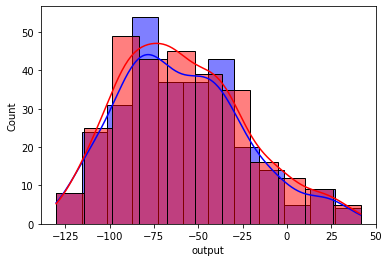

In [716]:
#Those Actual and Predicted values are compared and a graph is drawn
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

- The graph shows blue line for Actual data
- And red line for predicted data

In [717]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  7.04717000966317
Mean Squared Error:  219.40838200327008
Root Mean Squared Error:  14.812440109693949


# Random Forest Regression

In [718]:
#We are importing RandomForestRegressor from sklearn and creating an object using it
#Then traing the model with the prepared data
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [719]:
#Here we are predicting the output values for the input data
y_test_pred = regressor.predict(X_test_transformed)

In [720]:
#Then a data frame is created which shows the Actual and Predicted values of the output data
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
303,-18.117029,-14.044424
1420,11.947285,3.062330
1270,-43.431051,-66.103947
1133,-86.814043,-81.178430
916,-95.000000,-94.660739


<AxesSubplot:xlabel='output', ylabel='Count'>

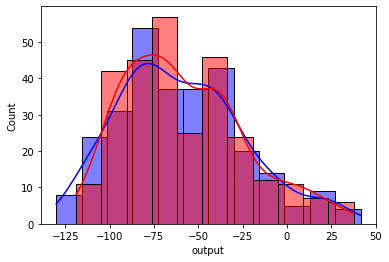

In [721]:
#Those Actual and Predicted values are compared and a graph is drawn
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

- The graph shows blue line for Actual data
- And red line for predicted data

In [722]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  9.937242981002811
Mean Squared Error:  207.02003055087195
Root Mean Squared Error:  14.388190662862094


# Gradient-boosting Regression

In [723]:
#We are importing GradientBoostingRegressor from sklearn and creating an object using it
#Then traing the model with the prepared data
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [724]:
#Here we are predicting the output values for the input data
y_test_pred = regressor.predict(X_test_transformed)

In [725]:
#Then a data frame is created which shows the Actual and Predicted values of the output data
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
303,-18.117029,-22.369086
1420,11.947285,-8.040578
1270,-43.431051,-61.113224
1133,-86.814043,-80.319459
916,-95.000000,-87.878113


<AxesSubplot:xlabel='output', ylabel='Count'>

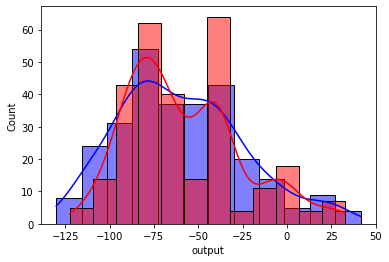

In [726]:
#Those Actual and Predicted values are compared and a graph is drawn
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

- The graph shows blue line for Actual data
- And red line for predicted data

In [727]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  12.30987131408332
Mean Squared Error:  250.53536727581138
Root Mean Squared Error:  15.828309046635757


# Support Vector Regression

In [728]:
#We are importing SVR from sklearn and creating an object using it
#Then traning the model with the prepared data
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [729]:
#Here we are predicting the output values for the input data
y_test_pred = regressor.predict(X_test_transformed)

In [730]:
#Then a data frame is created which shows the Actual and Predicted values of the output data
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
303,-18.117029,-23.222688
1420,11.947285,-20.550601
1270,-43.431051,-57.505998
1133,-86.814043,-71.692978
916,-95.000000,-84.084746


<AxesSubplot:xlabel='output', ylabel='Count'>

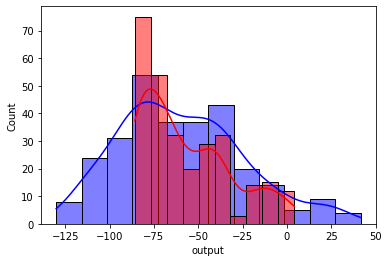

In [731]:
#Those Actual and Predicted values are compared and a graph is drawn
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

- The graph shows blue line for Actual data
- And red line for predicted data

In [732]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  14.270551234364467
Mean Squared Error:  333.00600043683716
Root Mean Squared Error:  18.248452001110593


# Ada Boosting Regression

In [733]:
#We are importing AdaBoostRegressor from sklearn and creating an object using it
#Then traing the model with the prepared data
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_transformed, y_train)

AdaBoostRegressor()

In [734]:
#Here we are predicting the output values for the input data
y_test_pred = regressor.predict(X_test_transformed)

In [735]:
#Then a data frame is created which shows the Actual and Predicted values of the output data
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
303,-18.117029,-25.785169
1420,11.947285,-13.656931
1270,-43.431051,-69.081504
1133,-86.814043,-86.634821
916,-95.000000,-79.163436


<AxesSubplot:xlabel='output', ylabel='Count'>

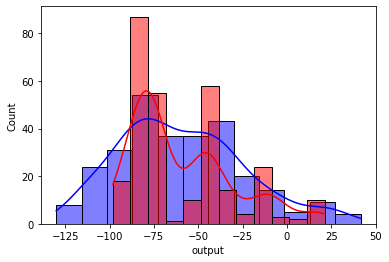

In [736]:
#Those Actual and Predicted values are compared and a graph is drawn
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

- The graph shows blue line for Actual data
- And red line for predicted data

In [737]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  14.292941420392555
Mean Squared Error:  322.8552219868341
Root Mean Squared Error:  17.968172472091705


# Conclusion

In [754]:
#Here We are creating a dataframe to get a clear understanding of the whole data, Models and their errors
#It becomes easy also to compare all the models easily when it is represented using a dataframe

In [739]:
df1 = {"Algorithm" :["Decision Tree Regression","Random Forest Regression","Gradient-boosting Regression","KNN Regression",
                     "Ada Boosting Regression","Support Vector Regression","Linear Regression"],
      "Mean Absolute Error" : [7.04717000966317, 9.937242981002811, 12.30987131408332, 13.447504207078321, 14.292941420392555,
                              14.270551234364467, 26.18279872700464],
       "Mean Squared Error" : [219.40838200327008, 207.02003055087195, 250.53536727581138, 293.3863182435642, 322.8552219868341,
                               333.00600043683716, 955.4840671205646],
       "Root Mean Squared Error" : [14.812440109693949, 14.388190662862094, 15.828309046635757, 17.128523527834037,
                                    17.968172472091705, 18.248452001110593, 30.91090531059491]
      }

In [740]:
pd.DataFrame(df1)

,Algorithm,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Decision Tree Regression,7.047170,219.408382,14.812440
1,Random Forest Regression,9.937243,207.020031,14.388191
2,Gradient-boosting Regression,12.309871,250.535367,15.828309
3,KNN Regression,13.447504,293.386318,17.128524
4,Ada Boosting Regression,14.292941,322.855222,17.968172
5,Support Vector Regression,14.270551,333.006000,18.248452
6,Linear Regression,26.182799,955.484067,30.910905


By this, We can say that Decision Tree Regression is giving the best model as the errors are less compared to other models

### Decision Tree Regression is the best model for the given data